# Kaggle Credit card fraud dataset analysis

Get the dataset from here: 
https://www.kaggle.com/dalpozz/creditcardfraud

## Goal

I'm gonna follow the stages defined in [Practical Data Science With R](https://www.amazon.in/gp/product/935119437X/ref=as_li_tl?ie=UTF8&camp=3638&creative=24630&creativeASIN=935119437X&linkCode=as2&tag=praj-21&linkId=ba3a4b019f14ccfac8c3a9d4e13d8ef9)

1. Define the goal
2. Collect and manage data
3. Build the model
4. Evaluate and Critique model
5. Present results and document
6. Deploy model

### Our goal

Use the features defined in the credit card dataset as well as their labels to build models that are accurately able to classify a transcation as fraudulent

### Data collection

Download from the Kaggle website. Comes in a zipped csv format

### Build a Model
#### EDA
We need to expore the dataset to understand the variable characteristics. This will enable us to pick the right family of models to build

In [23]:
install.packages("GGally")

Installing package into ‘/home/praj/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)


In [31]:
library(dplyr)
library(reshape2)
library(ggplot2)
library(parallel)
library(caret)
library(GGally)
library(ggthemes)
options(mc.cores=detectCores())

In [4]:
unzip("creditcardfraud.zip")

In [6]:
ccdat = read.csv('creditcard.csv')

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,⋯,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,⋯,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,⋯,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,⋯,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,⋯,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,⋯,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,⋯,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


## Preprocessing

In [7]:
ccdat %>% dim

[1] 284807     31

Looks like we have 284k rows and 31 columns.

In [8]:
cdat.cls = colnames(ccdat)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

Okay, let's check the column types. 

In [12]:
lapply(ccdat, class) %>% unique

[[1]]
[1] "numeric"

[[2]]
[1] "integer"

Looks like the 'Class' column is the only integer and everything else is numeric. 

Let's convert Class to a factor (discrete levels)

In [15]:
ccdat$Class = as.factor(ccdat$Class)

In [68]:
ccdat$Class %>% table

.
     0      1 
284315    492 

### Pre-process all the features

We have 492 of calss '1'. Safe to assume, these are the fraudulent transactions. Let's do some EDA
### Exploratory Data Analysis

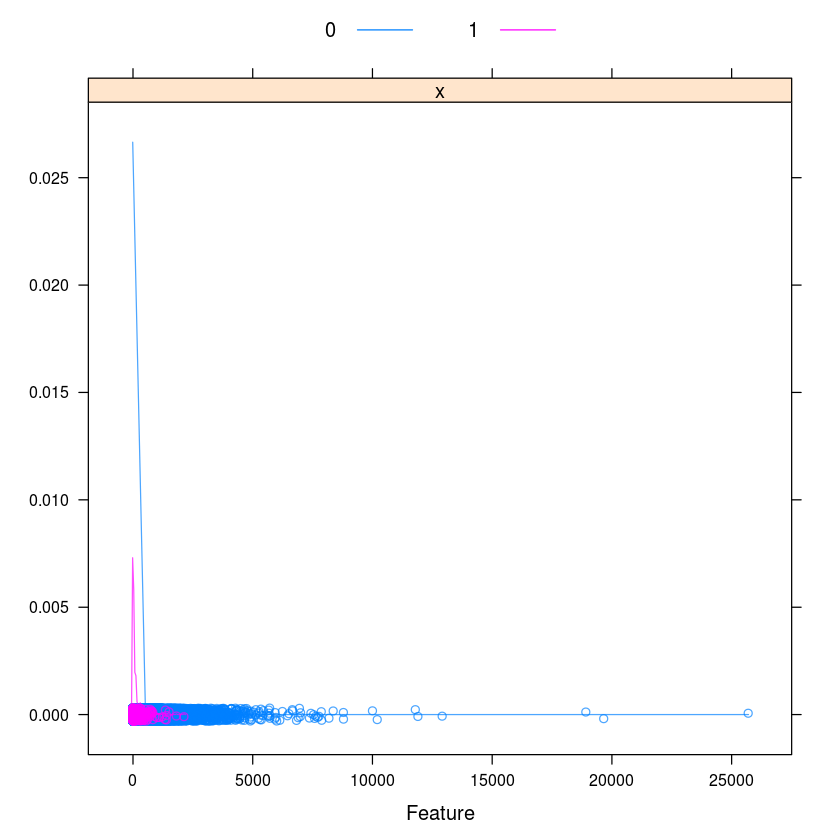

In [71]:
featurePlot(x =ccdat$Amount, y = ccdat$Class, plot='density', auto.key=list(columns=2), alpha=0.7)

Looks a lot like all the fraudulent transcations happened when the amount was below 5000

In [75]:
ccdat %>% select(Amount, Class) %>% filter(Class == 1 & Amount > 5000) %>% head %>% print
ccdat %>% select(Amount, Class) %>% filter(Class == 1 & Amount <= 5000) %>% head %>% print

[1] Amount Class 
<0 rows> (or 0-length row.names)
     Amount Class
1      0.00     1
2    529.00     1
3    239.93     1
4     59.00     1
5      1.00     1
6      1.00     1
7      1.00     1
8      1.00     1
9      1.00     1
10     1.00     1
11     1.00     1
12     1.00     1
13     1.00     1
14     1.00     1
15     1.00     1
16     1.00     1
17     1.00     1
18     1.00     1
19     1.00     1
20     1.00     1
21     1.00     1
22     1.10     1
23     1.00     1
24     1.00     1
25  1809.68     1
26     1.00     1
27     1.00     1
28     1.00     1
29     1.00     1
30     1.00     1
31     0.00     1
32    30.39     1
33   179.66     1
34     1.00     1
35     1.00     1
36     1.00     1
37     1.00     1
38     1.00     1
39    11.39     1
40     3.79     1
41     3.79     1
42     3.93     1
43     1.00     1
44   766.36     1
45  1218.89     1
46     1.00     1
47   188.78     1
48     1.00     1
49     1.00     1
50     1.00     1
51     1.00     1
52     1.00  

#### Let's see how many transcations we have more than $5000. From the feature plot above, we shouldn't have many

In [76]:
ccdat %>% select(Amount) %>% filter(Amount > 5000) %>% dim

[1] 55  1

#### Let's compare variable densities for fraudulent(FR) v/s non fraudulent(NFR) transcations
### 0 - NFR 
### 1 - FR

In [65]:
## Plot variable densities with the fill colour standing 
## for whether that transcation was fraudulent
plotDens <- function(dff, idxs) {
    ggplot(dff[,idxs] %>% melt(id.vars=c('Class'))) + 
    geom_density(aes(x=value, fill=Class), alpha = 0.3) + 
    facet_wrap(~variable, scales='free', shrink=F) + theme_minimal()
}

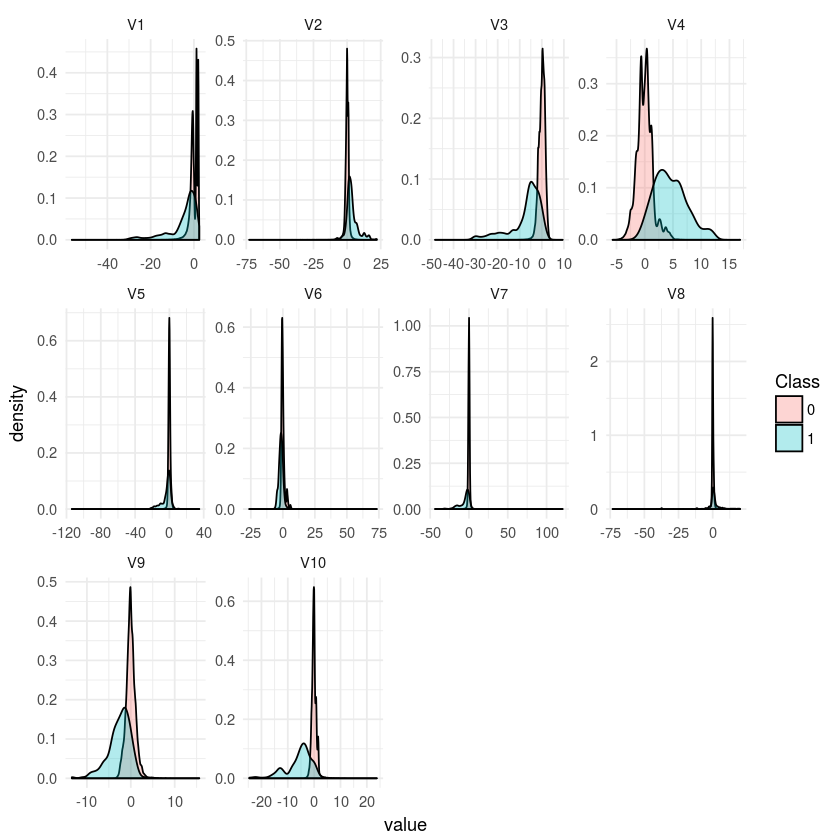

In [66]:
plotDens(ccdat, c(2:11, 31))

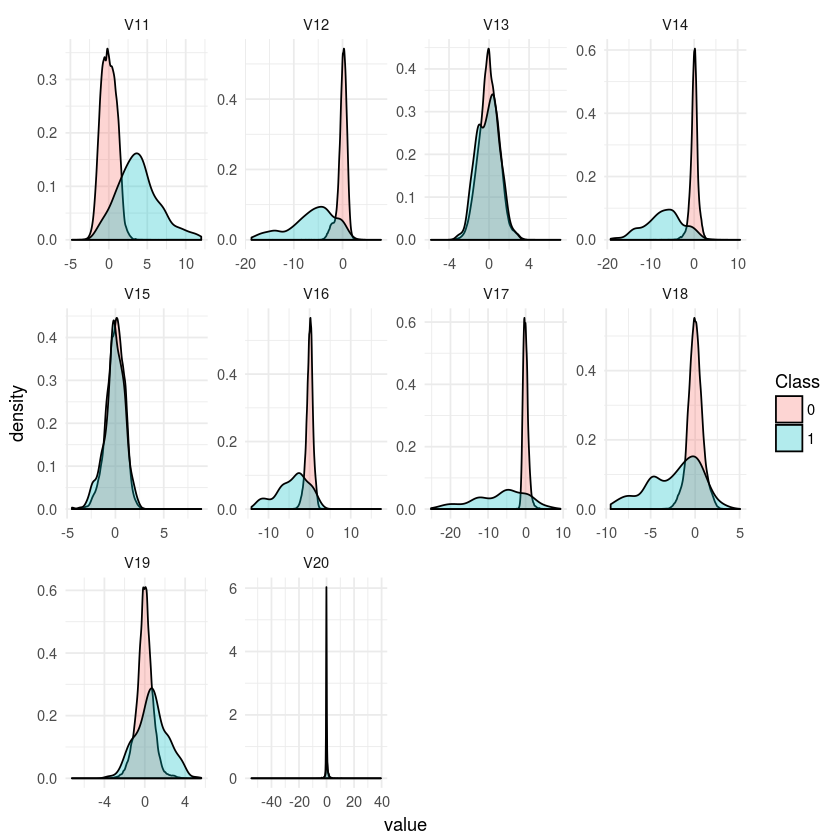

In [67]:
plotDens(ccdat, c(12:21, 31))

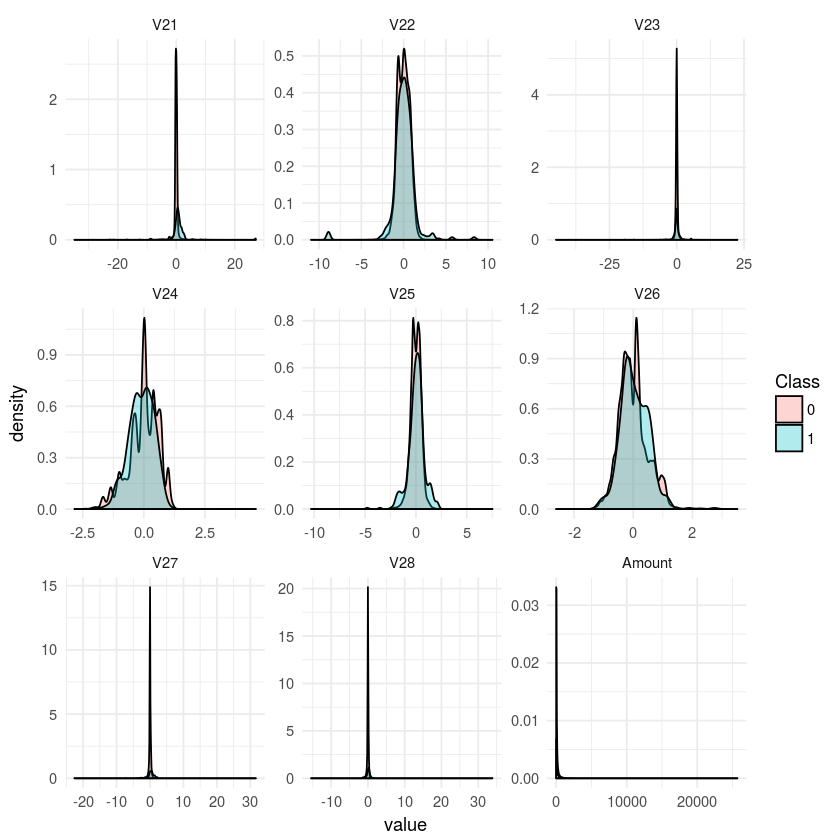

In [77]:
plotDens(ccdat, c(22:31))